In [88]:
import pandas as pd
import numpy as np
import re

#Tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.backend import clear_session
from tensorflow.keras.regularizers import L1, L2, L1L2 
import tensorflow as tf
import matplotlib.pyplot as plt
from plotly.offline import iplot

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [89]:
df = pd.read_csv('breast-cancer.csv')

In [90]:
df.drop(columns='Unnamed: 32',inplace=True)

In [91]:
def encode(arr):
    arr.loc[arr.diagnosis=='B']=0
    arr.loc[arr.diagnosis=='M']=1
    return arr

In [92]:
df_encoded = encode(df)


In [93]:
X = df_encoded.drop(columns=['diagnosis', 'id'])
y = df_encoded.diagnosis

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.5)

In [95]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
pca = PCA(n_components=7)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [97]:
explained_variance = pca.explained_variance_ratio_

In [98]:
explained_variance

array([1.00000000e+00, 9.65122014e-33, 9.65122014e-33, 9.65122014e-33,
       9.65122014e-33, 9.65122014e-33, 9.65122014e-33])

In [99]:
n = X_train.shape[0]

In [100]:
n

284

In [105]:
clear_session()
model = tf.keras.Sequential([
    tf.keras.Input(shape=(7,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(75, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])


In [106]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [107]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 75)                19275     
                                                                 
 dropout_1 (Dropout)         (None, 75)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 76        
                                                                 
Total params: 21,399
Trainable params: 21,399
Non-trainable params: 0
_________________________________________________________________


In [108]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.3)

Epoch 1/100
40/40 [==============================] - 1s 5ms/step - loss: 0.1396 - accuracy: 0.9545 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 5.5606e-04 - val_accuracy: 1.0000
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.3289e-04 - val_accuracy: 1.0000
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 5.7082e-04 - accuracy: 1.0000 - val_loss: 1.2684e-04 - val_accuracy: 1.0000
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 4.0291e-04 - accuracy: 1.0000 - val_loss: 7.6667e-05 - val_accuracy: 1.0000
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 2.0700e-04 - accuracy: 1.0000 - val_loss: 5.5956e-05 - va

Epoch 56/100
40/40 [==============================] - 0s 2ms/step - loss: 7.1518e-06 - accuracy: 1.0000 - val_loss: 1.3763e-07 - val_accuracy: 1.0000
Epoch 57/100
40/40 [==============================] - 0s 2ms/step - loss: 8.5941e-06 - accuracy: 1.0000 - val_loss: 1.3121e-07 - val_accuracy: 1.0000
Epoch 58/100
40/40 [==============================] - 0s 2ms/step - loss: 9.0333e-06 - accuracy: 1.0000 - val_loss: 1.2317e-07 - val_accuracy: 1.0000
Epoch 59/100
40/40 [==============================] - 0s 2ms/step - loss: 1.2617e-05 - accuracy: 1.0000 - val_loss: 1.1277e-07 - val_accuracy: 1.0000
Epoch 60/100
40/40 [==============================] - 0s 2ms/step - loss: 8.8588e-06 - accuracy: 1.0000 - val_loss: 1.0488e-07 - val_accuracy: 1.0000
Epoch 61/100
40/40 [==============================] - 0s 2ms/step - loss: 1.6256e-05 - accuracy: 1.0000 - val_loss: 9.7440e-08 - val_accuracy: 1.0000
Epoch 62/100
40/40 [==============================] - 0s 2ms/step - loss: 2.1467e-06 - accuracy: 1.0

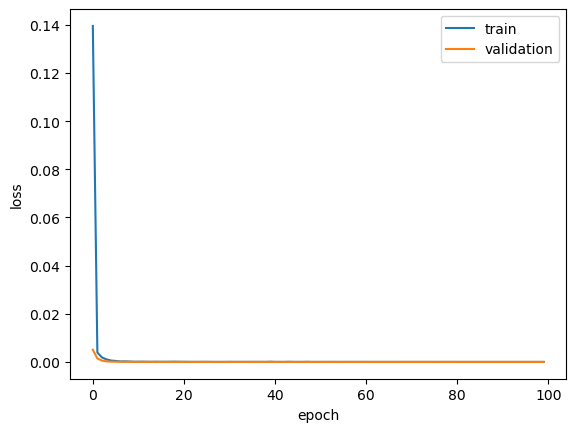

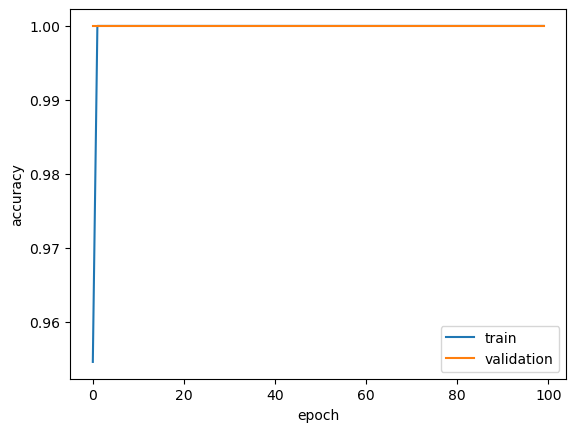

In [109]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show();

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show();

In [17]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
# Network design
model = Sequential()
model.add(Dense(256, activation)) 
model %>%# Input layer
 layer_dense(units = 256, activation = ‘relu’, input_shape =  ncol(X_train)) %>% 
 layer_dropout(rate = 0.4) %>% 
# Hidden layer
 layer_dense(units = 75, activation = ‘relu’) %>%
# Output layer
 layer_dropout(rate = 0.3) %>%
 layer_dense(units = 2, activation = ‘sigmoid’)

In [ ]:
# Network config
history <- model %>% compile(
 loss = ‘binary_crossentropy’,
 optimizer = ‘adam’,
 metrics = c(‘accuracy’)
)# Running our data
model %>% fit(
 X_train, y_train, 
 epochs = 100, 
 batch_size = 5,
 validation_split = 0.3
)summary(model)